In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df = pd.read_csv("Data/Bengaluru_House_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00000,1.00000,39.07000
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00000,3.00000,120.00000
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00000,3.00000,62.00000
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00000,1.00000,95.00000
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00000,1.00000,51.00000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.00000,0.00000,231.00000
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.00000,NaN,400.00000
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.00000,1.00000,60.00000
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.00000,1.00000,488.00000


In [4]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
df1 = df.drop(["area_type", "availability", "society", "balcony"], axis = 1)

In [7]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00000,39.07000
1,Chikka Tirupathi,4 Bedroom,2600,5.00000,120.00000
2,Uttarahalli,3 BHK,1440,2.00000,62.00000
3,Lingadheeranahalli,3 BHK,1521,3.00000,95.00000
4,Kothanur,2 BHK,1200,2.00000,51.00000
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.00000,231.00000
13316,Richards Town,4 BHK,3600,5.00000,400.00000
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.00000,60.00000
13318,Padmanabhanagar,4 BHK,4689,4.00000,488.00000


In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df1 = df1.dropna()

In [10]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00000,39.07000
1,Chikka Tirupathi,4 Bedroom,2600,5.00000,120.00000
2,Uttarahalli,3 BHK,1440,2.00000,62.00000
3,Lingadheeranahalli,3 BHK,1521,3.00000,95.00000
4,Kothanur,2 BHK,1200,2.00000,51.00000
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.00000,231.00000
13316,Richards Town,4 BHK,3600,5.00000,400.00000
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.00000,60.00000
13318,Padmanabhanagar,4 BHK,4689,4.00000,488.00000


In [11]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df1["bhk"] = df1["size"].str.split().str[0].astype(int)

C:\Users\razan\AppData\Local\Temp\ipykernel_10288\4290922965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["bhk"] = df1["size"].str.split().str[0].astype(int)


In [14]:
df1.drop("size", axis = 1, inplace = True)

C:\Users\razan\AppData\Local\Temp\ipykernel_10288\3274282561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("size", axis = 1, inplace = True)


In [15]:
df1

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.00000,39.07000,2
1,Chikka Tirupathi,2600,5.00000,120.00000,4
2,Uttarahalli,1440,2.00000,62.00000,3
3,Lingadheeranahalli,1521,3.00000,95.00000,3
4,Kothanur,1200,2.00000,51.00000,2
...,...,...,...,...,...
13315,Whitefield,3453,4.00000,231.00000,5
13316,Richards Town,3600,5.00000,400.00000,4
13317,Raja Rajeshwari Nagar,1141,2.00000,60.00000,2
13318,Padmanabhanagar,4689,4.00000,488.00000,4


In [16]:
df1[df1["bhk"] > 20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.00000,230.00000,27
4684,Munnekollal,2400,40.00000,660.00000,43


In [17]:
def is_float(value):
    try:
        float(value)
    except:
        return False
    return True
# This is a function to check that in a specific whether there are numerical values or not

In [18]:
def convert_sqft_to_num(value):
    number_of_elements = value.split("-")
    if len(number_of_elements) == 2:
        return ((float(number_of_elements[0]) + float(number_of_elements[1])) / 2)
    try:
        return float(value)
    except:
        return None

In [19]:
new_df1 = df1.copy()

In [20]:
new_df1["total_sqft"] = new_df1["total_sqft"].apply(convert_sqft_to_num)

In [21]:
new_df1

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4
2,Uttarahalli,1440.00000,2.00000,62.00000,3
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3
4,Kothanur,1200.00000,2.00000,51.00000,2
...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5
13316,Richards Town,3600.00000,5.00000,400.00000,4
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4


In [22]:
new_df1.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [23]:
new_df1["price_per_sqft"] = (new_df1["price"] * 100_000) / new_df1["total_sqft"]

In [24]:
new_df1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
...,...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5,6689.83493
13316,Richards Town,3600.00000,5.00000,400.00000,4,11111.11111
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2,5258.54514
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4,10407.33632


In [25]:
location_occurences = new_df1.groupby("location")["location"].agg("count").sort_values(ascending = False)
location_occurences

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [26]:
location_occurence_less_than_11 = location_occurences[location_occurences <= 10]
location_occurence_less_than_11

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [27]:
new_df1["location"] = new_df1["location"].apply(lambda location: "Other" if location in location_occurence_less_than_11 else location)

In [28]:
new_df1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
...,...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5,6689.83493
13316,Other,3600.00000,5.00000,400.00000,4,11111.11111
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2,5258.54514
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4,10407.33632


In [29]:
new_df1 = new_df1[~(new_df1["total_sqft"] / new_df1["bhk"] < 300)]

In [30]:
new_df1.shape

(12502, 6)

In [31]:
new_df1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.00000,2.00000,39.07000,2,3699.81061
1,Chikka Tirupathi,2600.00000,5.00000,120.00000,4,4615.38462
2,Uttarahalli,1440.00000,2.00000,62.00000,3,4305.55556
3,Lingadheeranahalli,1521.00000,3.00000,95.00000,3,6245.89086
4,Kothanur,1200.00000,2.00000,51.00000,2,4250.00000
...,...,...,...,...,...,...
13315,Whitefield,3453.00000,4.00000,231.00000,5,6689.83493
13316,Other,3600.00000,5.00000,400.00000,4,11111.11111
13317,Raja Rajeshwari Nagar,1141.00000,2.00000,60.00000,2,5258.54514
13318,Padmanabhanagar,4689.00000,4.00000,488.00000,4,10407.33632


In [32]:
new_df1["price_per_sqft"].describe()

count    12456.00000
mean      6308.50283
std       4168.12734
min        267.82981
25%       4210.52632
50%       5294.11765
75%       6916.66667
max     176470.58824
Name: price_per_sqft, dtype: float64

In [33]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        mean = np.mean(subdf["price_per_sqft"])
        std = np.std(subdf["price_per_sqft"])
        difference = mean - std
        sum = mean + std
        reduced_df = subdf[(subdf["price_per_sqft"] > difference) & (subdf["price_per_sqft"] <= sum)]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [34]:
new_df2 = remove_price_per_sqft_outliers(new_df1)

In [35]:
new_df2

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.00000,2.00000,44.00000,3,3520.00000
1,Devarachikkanahalli,1250.00000,2.00000,40.00000,2,3200.00000
2,Devarachikkanahalli,1200.00000,2.00000,83.00000,2,6916.66667
3,Devarachikkanahalli,1170.00000,2.00000,40.00000,2,3418.80342
4,Devarachikkanahalli,1425.00000,2.00000,65.00000,3,4561.40351
...,...,...,...,...,...,...
10239,Yeshwanthpur,1676.00000,3.00000,92.13000,3,5497.01671
10240,Yeshwanthpur,2503.00000,3.00000,138.00000,3,5513.38394
10241,Yeshwanthpur,1855.00000,3.00000,135.00000,3,7277.62803
10242,Yeshwanthpur,1876.00000,3.00000,160.00000,3,8528.78465


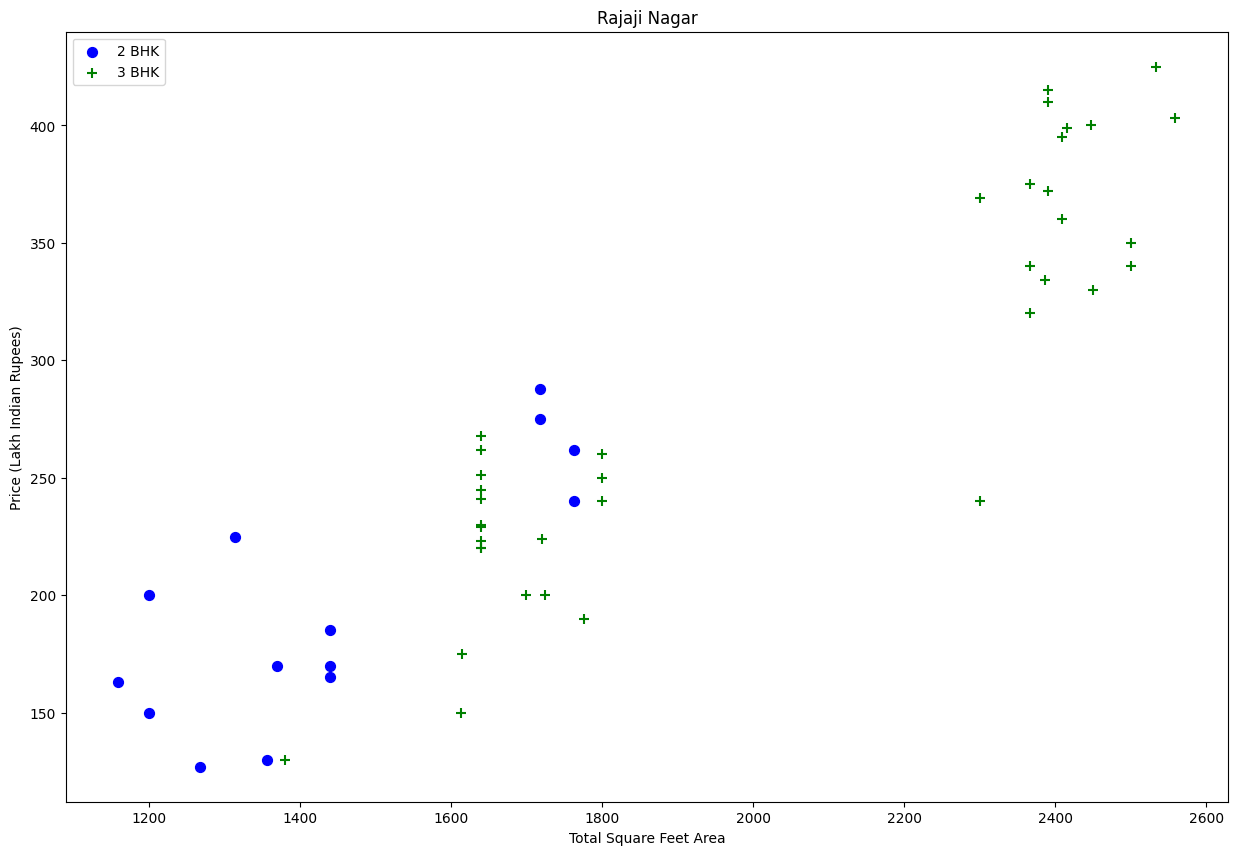

In [36]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
    bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2["total_sqft"], bhk2["price"], color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3["total_sqft"], bhk3["price"], marker = '+', color = 'green', label = '3 BHK', s = 50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(new_df2,"Rajaji Nagar")

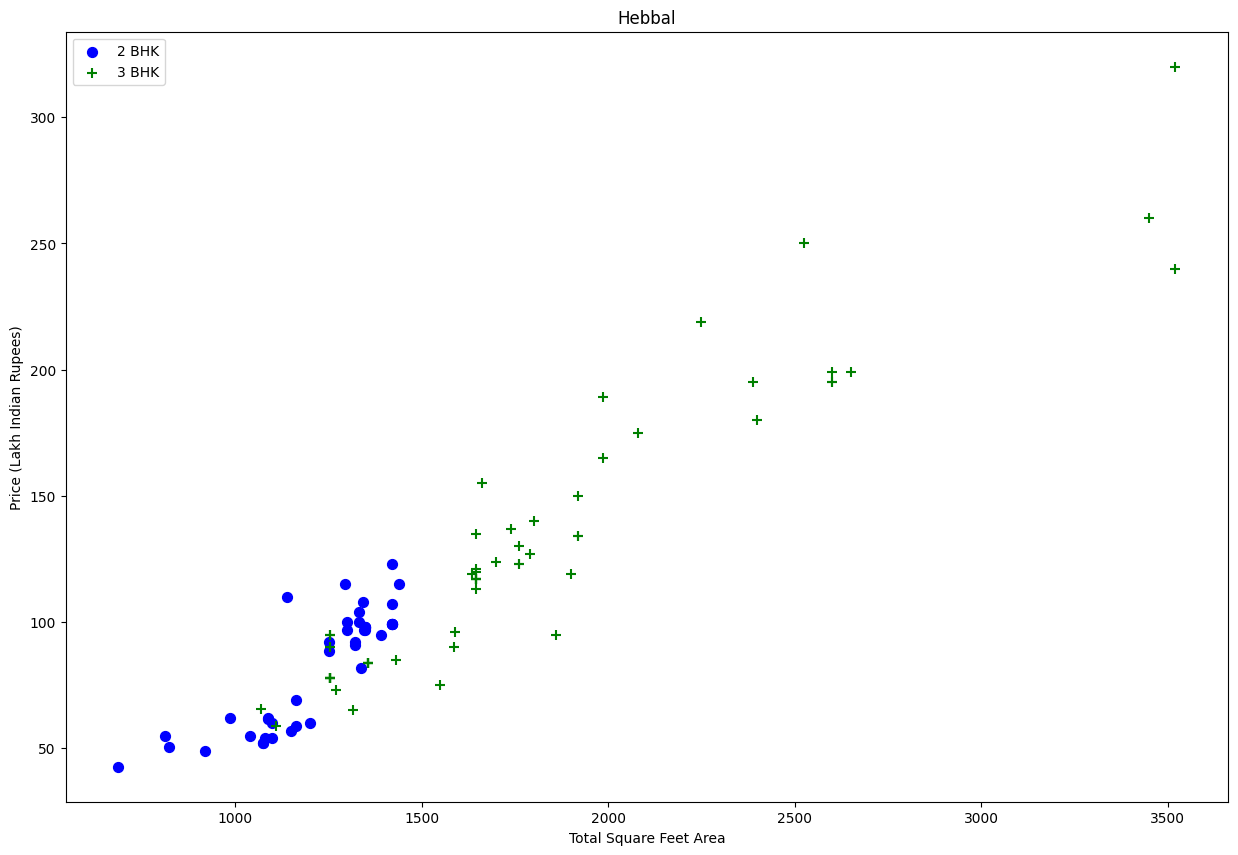

In [37]:
plot_scatter_chart(new_df2,"Hebbal")

##### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    }, 
}

##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
new_df3 = remove_bhk_outliers(new_df2)
new_df3

,location,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.00000,2.00000,40.00000,2,3200.00000
2,Devarachikkanahalli,1200.00000,2.00000,83.00000,2,6916.66667
3,Devarachikkanahalli,1170.00000,2.00000,40.00000,2,3418.80342
4,Devarachikkanahalli,1425.00000,2.00000,65.00000,3,4561.40351
5,Devarachikkanahalli,947.00000,2.00000,43.00000,2,4540.65470
...,...,...,...,...,...,...
10233,Yeshwanthpur,1195.00000,2.00000,100.00000,2,8368.20084
10234,Yeshwanthpur,1692.00000,3.00000,108.00000,3,6382.97872
10236,Yeshwanthpur,2500.00000,5.00000,185.00000,6,7400.00000
10241,Yeshwanthpur,1855.00000,3.00000,135.00000,3,7277.62803


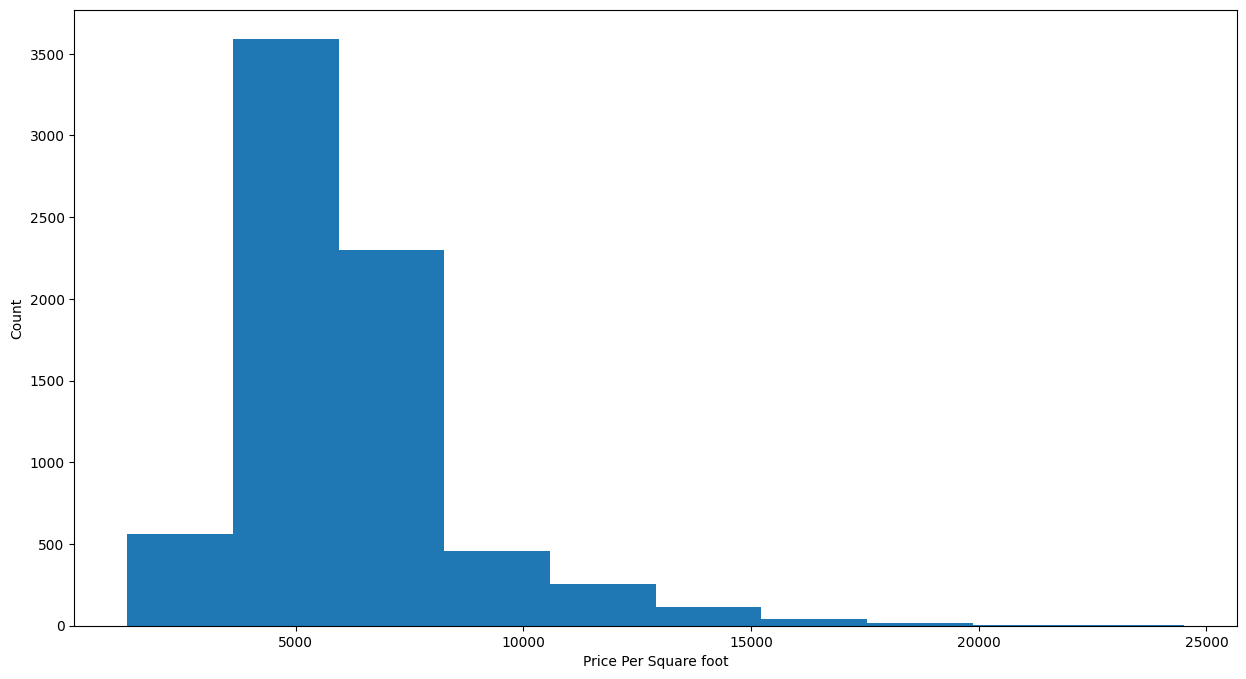

In [39]:
matplotlib.rcParams["figure.figsize"] = (15, 8)
plt.hist(new_df3["price_per_sqft"])
plt.xlabel("Price Per Square foot")
plt.ylabel("Count")
plt.show()

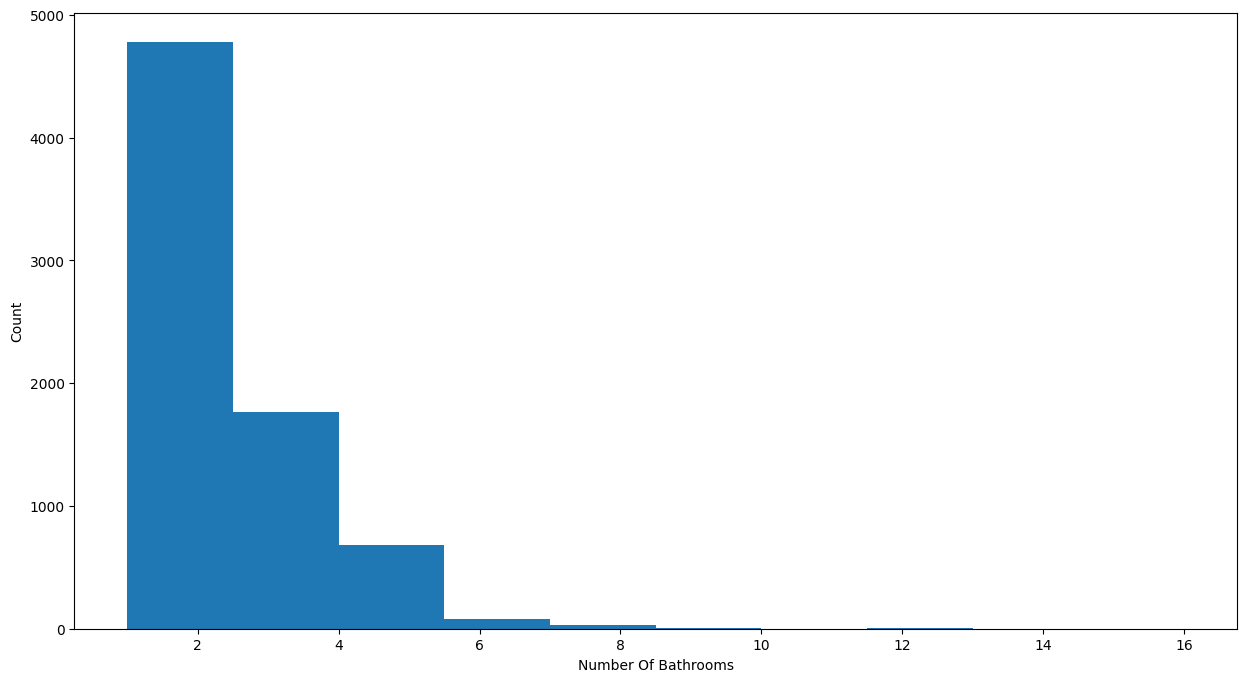

In [40]:
matplotlib.rcParams["figure.figsize"] = (15, 8)
plt.hist(new_df3["bath"])
plt.xlabel("Number Of Bathrooms")
plt.ylabel("Count")
plt.show()

In [41]:
new_df3[new_df3["bath"] >= 10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,4000.00000,12.00000,160.00000,10,4000.00000
5924,Other,12000.00000,12.00000,525.00000,10,4375.00000
6013,Other,10000.00000,16.00000,550.00000,16,5500.00000
6752,Other,6000.00000,12.00000,150.00000,11,2500.00000
7084,Other,5425.00000,13.00000,275.00000,13,5069.12442


In [42]:
new_df3[new_df3["bhk"] + 2 < new_df3["bath"]]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.00000,7.00000,80.00000,4,3252.03252
5232,Nagasandra,7000.00000,8.00000,450.00000,4,6428.57143
5848,Other,11338.00000,9.00000,1000.00000,6,8819.89769
9016,Thanisandra,1806.00000,6.00000,116.00000,3,6423.03433


In [43]:
new_df4 = new_df3[new_df3["bhk"] + 2 > new_df3["bath"]]

In [44]:
new_df4

,location,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.00000,2.00000,40.00000,2,3200.00000
2,Devarachikkanahalli,1200.00000,2.00000,83.00000,2,6916.66667
3,Devarachikkanahalli,1170.00000,2.00000,40.00000,2,3418.80342
4,Devarachikkanahalli,1425.00000,2.00000,65.00000,3,4561.40351
5,Devarachikkanahalli,947.00000,2.00000,43.00000,2,4540.65470
...,...,...,...,...,...,...
10233,Yeshwanthpur,1195.00000,2.00000,100.00000,2,8368.20084
10234,Yeshwanthpur,1692.00000,3.00000,108.00000,3,6382.97872
10236,Yeshwanthpur,2500.00000,5.00000,185.00000,6,7400.00000
10241,Yeshwanthpur,1855.00000,3.00000,135.00000,3,7277.62803


In [45]:
new_df5 = new_df4.drop("price_per_sqft", axis = 1)

In [46]:
new_df5

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.00000,2.00000,40.00000,2
2,Devarachikkanahalli,1200.00000,2.00000,83.00000,2
3,Devarachikkanahalli,1170.00000,2.00000,40.00000,2
4,Devarachikkanahalli,1425.00000,2.00000,65.00000,3
5,Devarachikkanahalli,947.00000,2.00000,43.00000,2
...,...,...,...,...,...
10233,Yeshwanthpur,1195.00000,2.00000,100.00000,2
10234,Yeshwanthpur,1692.00000,3.00000,108.00000,3
10236,Yeshwanthpur,2500.00000,5.00000,185.00000,6
10241,Yeshwanthpur,1855.00000,3.00000,135.00000,3


In [47]:
location_dummies = pd.get_dummies(new_df5["location"], dtype = int)
location_dummies.drop("Other", axis = 1, inplace = True)
location_dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
df = pd.concat([new_df5, location_dummies], axis = 1)

In [49]:
df.drop("location", axis = 1, inplace = True)

In [50]:
df

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.00000,2.00000,40.00000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.00000,2.00000,83.00000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.00000,2.00000,40.00000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.00000,2.00000,65.00000,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.00000,2.00000,43.00000,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1195.00000,2.00000,100.00000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,1692.00000,3.00000,108.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,2500.00000,5.00000,185.00000,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,1855.00000,3.00000,135.00000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
X = df.drop("price", axis = 1)
X

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.00000,2.00000,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.00000,2.00000,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.00000,2.00000,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.00000,2.00000,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.00000,2.00000,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1195.00000,2.00000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,1692.00000,3.00000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,2500.00000,5.00000,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10241,1855.00000,3.00000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
y = df["price"]
y

1        40.00000
2        83.00000
3        40.00000
4        65.00000
5        43.00000
           ...   
10233   100.00000
10234   108.00000
10236   185.00000
10241   135.00000
10242   160.00000
Name: price, Length: 7264, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
X_train

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2992,1231.00000,2.00000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9252,1175.00000,2.00000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6210,1800.00000,3.00000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3509,2700.00000,3.00000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4757,1260.00000,2.00000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,1162.00000,2.00000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7026,3000.00000,4.00000,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7095,1200.00000,3.00000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7446,850.00000,1.00000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y_train

2992    50.00000
9252    47.00000
6210   140.00000
3509   324.00000
4757    58.00000
          ...   
4675    52.00000
7026   301.00000
7095    70.00000
7446    50.00000
1009   100.00000
Name: price, Length: 5811, dtype: float64

In [56]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

round(lr_model.score(X_test, y_test) * 100, 2)

87.2

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)

scores_list = cross_val_score(LinearRegression(), X, y, cv = cv)
for scores in scores_list:
    print(round(scores * 100, 2))

87.2
83.09
84.41
84.94
80.39
84.12
80.19
86.84
84.73
79.32


In [58]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_GridCV(X, y):
    models = {
        "Linear Regression": {
            "model": LinearRegression(),
            "params": {}
        },
        
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        
        "Decision Tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "splitter": ["best", "random"]
            }
        }
    }
    
    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for model, config in models.items(): 
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_GridCV(X, y)

,model,best_score,best_params
0,Linear Regression,0.83916,{}
1,lasso,0.72077,"{'alpha': 1, 'selection': 'random'}"
2,Decision Tree,0.68131,{'splitter': 'random'}


In [59]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [60]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x =  np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_model.predict([x])[0]

In [61]:
predict_price("1st Phase JP Nagar", 1000, 3, 3)

C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.04272507129899

In [62]:
predict_price("5th Block Hbr Layout", 1000, 3, 3)

C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


46.440285883308896

In [63]:
predict_price("Yeshwanthpur", 1000, 3, 3)

C:\Users\razan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.578478800227

In [64]:
import pickle

with open("bengaluru_price_predicting_model.pickle", "wb") as f:
    pickle.dump(lr_model, f)

In [65]:
import json

columns = {
    "data_columns": [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))